<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [32]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [33]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [34]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [35]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [36]:
# Answer:
movies.sort_values(by='duration').head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [37]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

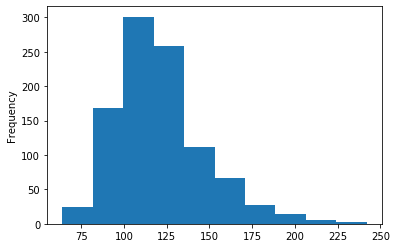

In [38]:
# Answer:
movies.duration.plot(kind='hist', bins=10)

#### Use a box plot to display that same data.

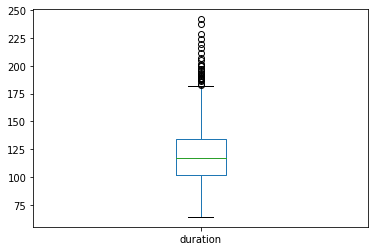

In [39]:
# Answer:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [40]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

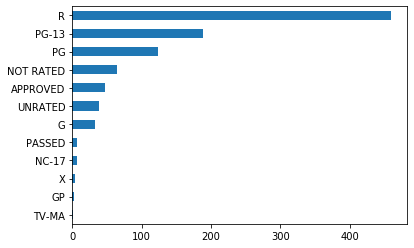

In [41]:
# Answer:
movies.content_rating.value_counts().sort_values().plot(kind='barh')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [51]:
# Answer:
movies.content_rating = movies.content_rating.replace(['NOT RATED','PG',
                                                       'APPROVED','PASSED','GP'],'UNRATED')

In [52]:
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'G', 'X', nan, 'TV-MA', 'NC-17'],
      dtype=object)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [54]:
# Answer:
movies.content_rating = movies.content_rating.replace(['TV-MA','X'],'NC-17')

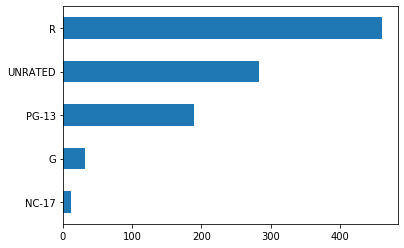

In [55]:
movies.content_rating.value_counts().sort_values().plot(kind='barh')

#### Count the number of missing values in each column.

In [56]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [57]:
# Answer:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [60]:
movies.content_rating.fillna("UNRATED",inplace=True)

In [61]:
movies.content_rating.value_counts().sort_values()

NC-17       12
G           32
PG-13      189
UNRATED    286
R          460
Name: content_rating, dtype: int64

In [63]:
movies.content_rating.isnull().sum()

0

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [ ]:
# Answer:

In [71]:
print(movies.star_rating.mean())
print(movies[movies.duration >= 120 ].star_rating.mean())
print(movies[movies.duration < 120 ].star_rating.mean())

7.8897854954034985
7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

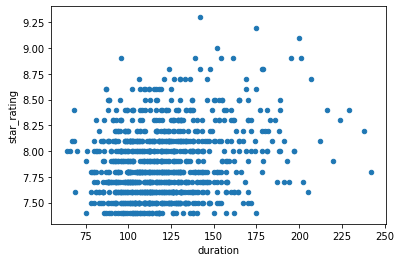

In [75]:
movies.plot.scatter(x='duration', y='star_rating')

#### Calculate the average duration for each genre.

In [94]:
# Answer:
movies.genre.unique()

for x in movies.genre.unique():
    print(f'Genre: {x}, Avg. Duration: {round(movies[movies.genre == x].duration.mean(),1)}')

Genre: Crime, Avg. Duration: 122.3
Genre: Action, Avg. Duration: 126.5
Genre: Drama, Avg. Duration: 126.5
Genre: Western, Avg. Duration: 136.7
Genre: Adventure, Avg. Duration: 134.8
Genre: Biography, Avg. Duration: 131.8
Genre: Comedy, Avg. Duration: 107.6
Genre: Animation, Avg. Duration: 96.6
Genre: Mystery, Avg. Duration: 115.6
Genre: Horror, Avg. Duration: 102.5
Genre: Film-Noir, Avg. Duration: 97.3
Genre: Sci-Fi, Avg. Duration: 109.0
Genre: History, Avg. Duration: 66.0
Genre: Thriller, Avg. Duration: 114.2
Genre: Family, Avg. Duration: 107.5
Genre: Fantasy, Avg. Duration: 112.0


## Advanced level

#### Visualize the relationship between content rating and duration.

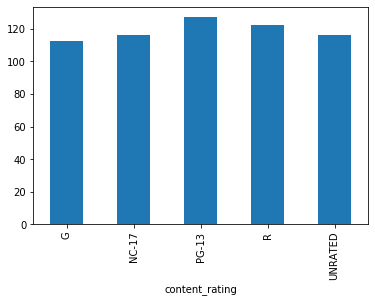

In [105]:
movies.groupby('content_rating').duration.mean().plot(kind='bar')

#### Determine the top rated movie (by star rating) for each genre.

In [136]:
data = []
for x in movies.genre.unique():
    data.append(movies[movies.genre == x].sort_values(by='star_rating',ascending=False).iloc[0,[3,0,1]])

pd.DataFrame(data)

,genre,star_rating,title
0,Crime,9.3,The Shawshank Redemption
3,Action,9.0,The Dark Knight
5,Drama,8.9,12 Angry Men
6,Western,8.9,"The Good, the Bad and the Ugly"
7,Adventure,8.9,The Lord of the Rings: The Return of the King
8,Biography,8.9,Schindler's List
25,Comedy,8.6,Life Is Beautiful
30,Animation,8.6,Spirited Away
38,Mystery,8.6,Rear Window
39,Horror,8.6,Psycho


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [138]:
# Answer:
movies.title.duplicated().sum()

4

In [141]:
#no, they are not duplicates. Lkely sequals 
movies[movies.title.duplicated(keep=False)].sort_values(by='title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [183]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [180]:
genre10 = movies[movies.groupby("genre")['genre'].transform('size') >= 10]


In [182]:
movies.shape, genre10.shape

((979, 6), (953, 6))

In [181]:
genre10.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [186]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!